In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
%matplotlib inline

<h1>Het importeren van de Bank Marketing Dataset</h1>

De data is gerelateerd aan een marketing campagne van een Portugese bank instituut. Deze campagnes zijn gebaseerd op telefoongesprekken. Ook was er sprake van meer dan een keer contact met de zelfde client. Dit was benodigd om het product(Deposit colum in data) een waarde van "Yes" of "No" te geven.

Kaggle Dataset link: https://www.kaggle.com/janiobachmann/bank-marketing-dataset

In [2]:
df = pd.read_csv('bank.csv') #importeren van data

In [3]:
df.head() #een idee krijgen van de 5 bovenste colummen van de data.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


<h1> Exploratory Data Analyse </h1>

Eerst wil ik checken wat voor soort datatypes er zijn binnen de gegeven dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.isnull().sum() #kijken of er missende waarde zijn in de gehele dataset

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
#Deze code genereert de percentage van missende waarde per colum (voor zekerheid) 
col_lst = df.columns.tolist()
temp_1 = []
tot_mis_vals = 0

for i in range(len(col_lst)):
    missing_vals = df.iloc[:,i].isnull().sum()
    tot_mis_vals += missing_vals
    temp = (missing_vals / len(df)) * 100
    print('Percentage of missing values in', col_lst[i],'is: ',temp , '%')
    temp_1.append(temp)

mis_dict = {'Columns':col_lst, 'Missing value percent':temp_1}
mis_data = pd.DataFrame(mis_dict)
total_per = tot_mis_vals / (len(df)*len(col_lst)) * 100
print('\n Total percentage of missing data: ', total_per, "%")

Percentage of missing values in age is:  0.0 %
Percentage of missing values in job is:  0.0 %
Percentage of missing values in marital is:  0.0 %
Percentage of missing values in education is:  0.0 %
Percentage of missing values in default is:  0.0 %
Percentage of missing values in balance is:  0.0 %
Percentage of missing values in housing is:  0.0 %
Percentage of missing values in loan is:  0.0 %
Percentage of missing values in contact is:  0.0 %
Percentage of missing values in day is:  0.0 %
Percentage of missing values in month is:  0.0 %
Percentage of missing values in duration is:  0.0 %
Percentage of missing values in campaign is:  0.0 %
Percentage of missing values in pdays is:  0.0 %
Percentage of missing values in previous is:  0.0 %
Percentage of missing values in poutcome is:  0.0 %
Percentage of missing values in deposit is:  0.0 %

 Total percentage of missing data:  0.0 %


Kortom, er mist dus geen data in de dataset

<h1>Het scheiden van continue en categorische variabele</h1>

In [7]:
#cat en con lijsten bevatten de colum namen van de categorische en continue variabele
cat_ord, cat_int, con_flt, con_int, cat, con = [], [], [], [], [], []

In [8]:
#Vergelijken van elke eature datatype en het filteren van de continue features 
for i,j in zip(df.dtypes.index.tolist(), df.dtypes):
    if np.issubdtype(j, np.float64) or np.issubdtype(j, np.float32):
        con_flt.append(i)
    if np.issubdtype(j, np.object_) or np.issubdtype(j, np.string_):
        cat_ord.append(i)
    if np.issubdtype(j, np.int64) or np.issubdtype(j, np.int32):
        con_int.append(i)

con = con_flt + con_int     

In [9]:
#filteren categorische features
for i in con_int:
    if len(df[i].value_counts().index) < 10:
        cat_int.append(i)
        con.remove(i)
        
for i in cat_ord:
    if len(df[i].value_counts().index) < 10:
        cat.append(i)
        
cat = cat + cat_int

In [10]:
print("Continuos variables: " + str(con))
print("Categorical variables: " + str(cat))

Continuos variables: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical variables: ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'deposit']


<h1> Het checken van de hoeveelheid van elke waarde in de categorische variabele</h1>

In [11]:
def n_unq(data):
    for i in data.columns:
        print('Total values in ' + i + ' are: ' + str(data[i].value_counts()) + '\n\n')

In [12]:
n_unq(df[cat])

Total values in marital are: married     6351
single      3518
divorced    1293
Name: marital, dtype: int64


Total values in education are: secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64


Total values in default are: no     10994
yes      168
Name: default, dtype: int64


Total values in housing are: no     5881
yes    5281
Name: housing, dtype: int64


Total values in loan are: no     9702
yes    1460
Name: loan, dtype: int64


Total values in contact are: cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64


Total values in poutcome are: unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64


Total values in deposit are: no     5873
yes    5289
Name: deposit, dtype: int64




<h1> Controleren data types in dataset </h1>

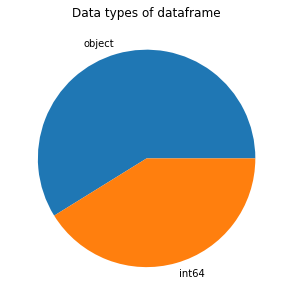

In [12]:
#Laat zien welke datatype in de dataset
fig = plt.figure(figsize=(5, 5))
df.dtypes.value_counts().plot(kind='pie', label='', )
_ = plt.title('Data types of dataframe')
plt.show()

<h1>Data Visualisatie</h1>

De count plot beneden laat zien dat meer dan de helft van de mensen in de dataset getrouwd zijn. 3500 mensen zijn singel en 2000 zijn gescheiden.

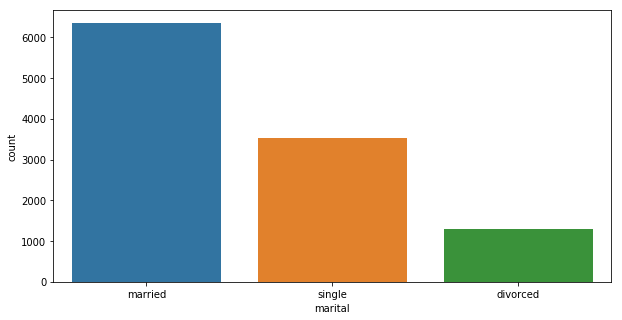

In [13]:
fig = plt.figure(figsize=(10, 5))
_ = sns.countplot(x='marital', data=df)
plt.show()

Hieronder een countplot dat de maximale aantal mensen in een "job" laten zien.

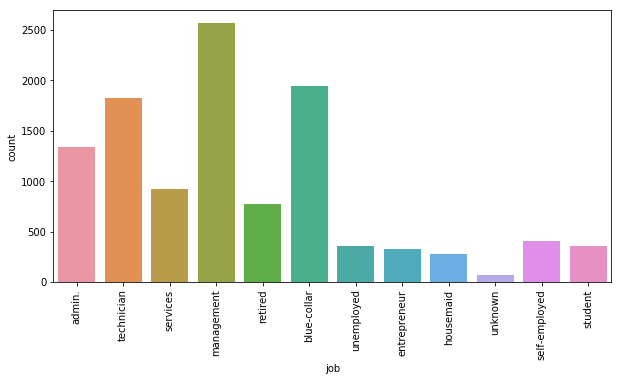

In [14]:
fig = plt.figure(figsize=(10, 5))
_ = sns.countplot(x='job', data=df)
locs, labels = plt.xticks()
_ = plt.setp(labels, rotation=90)
plt.show()

Hieronder een colum over genoten opleiding van de in de dataset genoteerde gegevens.

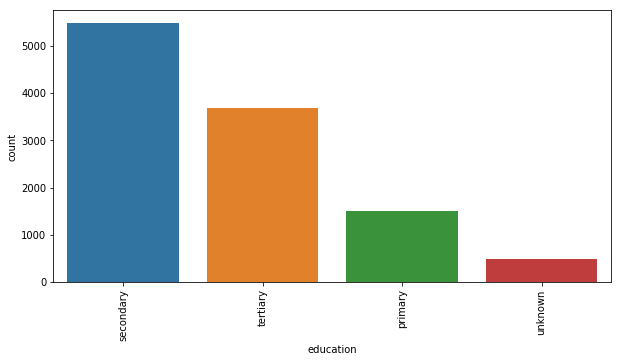

In [15]:
fig = plt.figure(figsize=(10, 5))
_ = sns.countplot(x='education', data=df)
locs, labels = plt.xticks()
_ = plt.setp(labels, rotation=90)
plt.show()

<h1> Het checken van de bar graph </h1>

In de data hieronder ga ik de relatie tussen de antwoord(van mensen op de dataset) variabele en andere variabele(housing, loan, default) om erachter te komen hoeveel mensen voor een "deposit" gaan. 

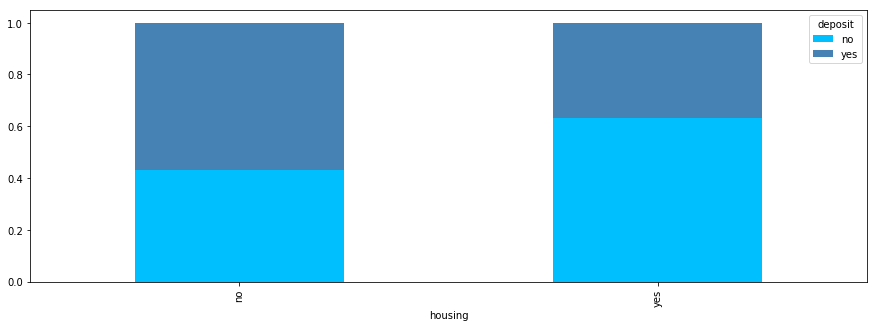

In [16]:
draw_data = pd.crosstab(df.housing, df.deposit)
_ = draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

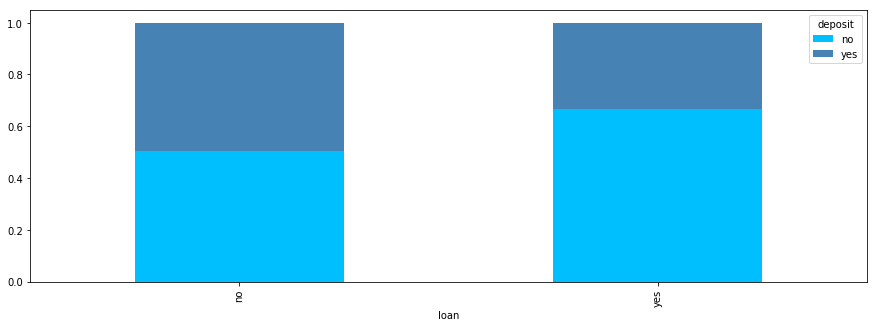

In [17]:
draw_data = pd.crosstab(df.loan, df.deposit)
_ = draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

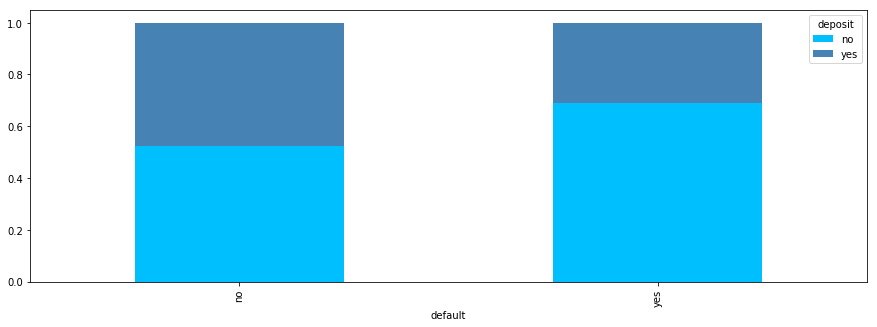

In [18]:
draw_data = pd.crosstab(df.default, df.deposit)
_ = draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

<h1> Histogram Plots </h1>

Ook is interessant om te zien hoe de data zich gedraagt (gebalanceerd, ongebalanceerd.) De plots hieronder laten zien dat er een grote mate van "skewness" is van de data aan de linkerkant. Deze data skewness zorgt ervoor dat ik de data meer efficient moet sampelen terwijl ik de train_data en test_data classificeer.

* Plot voor Duratie:

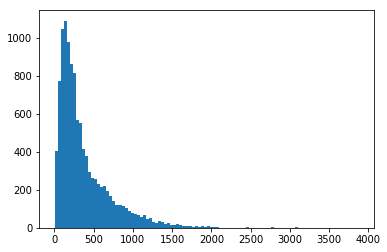

In [19]:
plt.hist((df.duration),bins=100)
plt.show()

* Plot voor Leeftijd

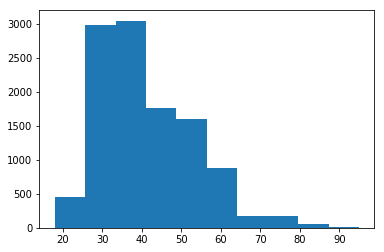

In [20]:
plt.hist(df.age,bins=10)
plt.show()

* Plot voor balans

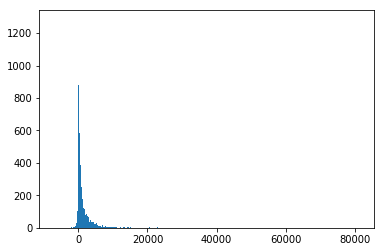

In [21]:
plt.hist(df.balance,bins=1000)
plt.show()

Boven had ik reeds de onderscheid gemaakt tussen een categorische en een continue variabele. Hieronder ga ik box plots maken voor de continue variable met standaard deviatie om op zogenaamde outliers te controleren.

Conclusie van onderstaande boxplots:

* Data (Q3 x 1.5) is de outlier waar Q3 75% is.
* Derhalve check ik de outliers op 75%, alles groter zie ik als een outlier. Dit is ook te zien in de boxplots.

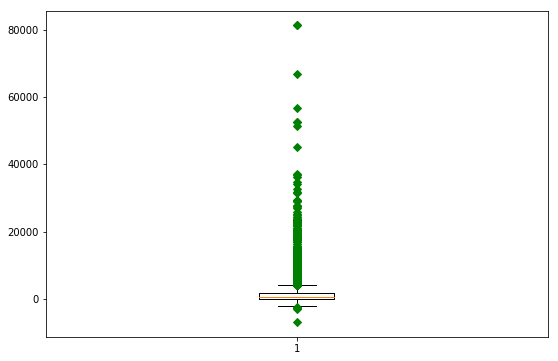

In [22]:
fig = plt.figure(1, figsize=(9, 6))
ax2 = fig.add_subplot(111)
bp2 = ax2.boxplot(df.balance,0,'gD')
plt.show()

Boxplot voor Leeftijd

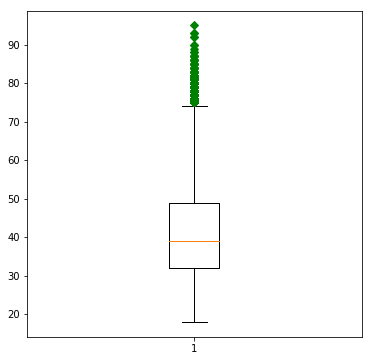

In [23]:
fig = plt.figure(1, figsize=(6, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(df.age,0,'gD')
plt.show()

Boxplot voor Duratie

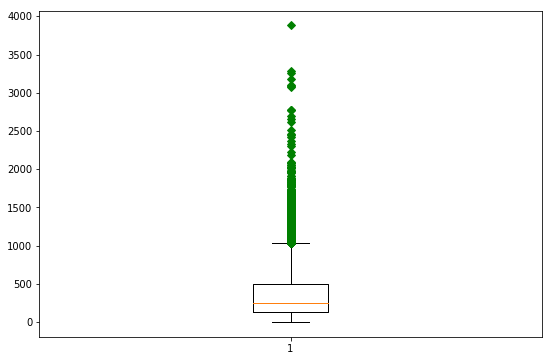

In [24]:
fig = plt.figure(1, figsize=(9, 6))
ax2 = fig.add_subplot(111)
bp2 = ax2.boxplot(df.duration,0,'gD')
plt.show()

Zoals je kan zien van de boxplots, de meeste datapunten liggen boven de 3e quantiel met de multiplicatie factor van 1.5. Dus ik kan concluderen dat deze datapunten de outlier is voor de meeste datapunten.

<h1> Feature Engineering </h1>

Na het bekijken van de bar grafiek, kan ik concluderen en observeren dat de Feature vs Label data te "wide spread" is. Want ik kan dus bijvoorbeeld niet voorspellen op een feature alleen. Vandaar dus dat ik gekomen ben tot Feature Engineering.

* Veranderen van de string waarde in de categorische features naar numerieke waarde.

In [25]:
dumy = pd.get_dummies(df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']],
                      drop_first=True)

In [26]:
data = pd.concat([df, dumy], axis=1)

In [27]:
data.deposit.replace({'yes':1, 'no':0}, inplace=True)

<h1> Het maken van nieuwe Features van bestaande Features </h1>

In [28]:
#Feature Engineering
def age_(data):
    
    data['Adult'] = 0
    data['Middle_Aged'] = 0
    data['old'] = 0    
    data.loc[(data['age'] <= 35) & (data['age'] >= 18),'Adult'] = 1
    data.loc[(data['age'] <= 60) & (data['age'] >= 36),'Middle_Aged'] = 1
    data.loc[data['age'] >=61,'old'] = 1
    
    return data

def pdays_(data):
    data['pdays_not_contacted'] = 0
    data['months_passed'] = 0
    data.loc[data['pdays'] == -1 ,'pdays_not_contacted'] = 1
    data['months_passed'] = data['pdays']/30
    data.loc[(data['months_passed'] >= 0) & (data['months_passed'] <=2) ,'months_passed'] = 1
    data.loc[(data['months_passed'] > 2) & (data['months_passed'] <=6),'months_passed'] = 2
    data.loc[data['months_passed'] > 6 ,'months_passed'] = 3
    
    return data

In [29]:
data = age_(data)
data = pdays_(data)

In [30]:
data.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'month', 'day', 'pdays', 'age'],
          axis=1, inplace=True)

Hierboven heb ik alle originele colums gedropt omdat ik nu dummy variabele heb aangemaakt te zien in de volgende code:

In [31]:
data.head()

,balance,duration,campaign,previous,deposit,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,Adult,Middle_Aged,old,pdays_not_contacted,months_passed
0,2343,1042,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,-0.033333
1,45,1467,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,-0.033333
2,1270,1389,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,-0.033333
3,2476,579,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,-0.033333
4,184,673,2,0,1,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,-0.033333


<h1> Correlatie Checken </h1>

Hierbij kijk ik naar de correlatie tussen de verschillende variabele en het verwijderen van variabele die meer dan 80% correlatie heeft

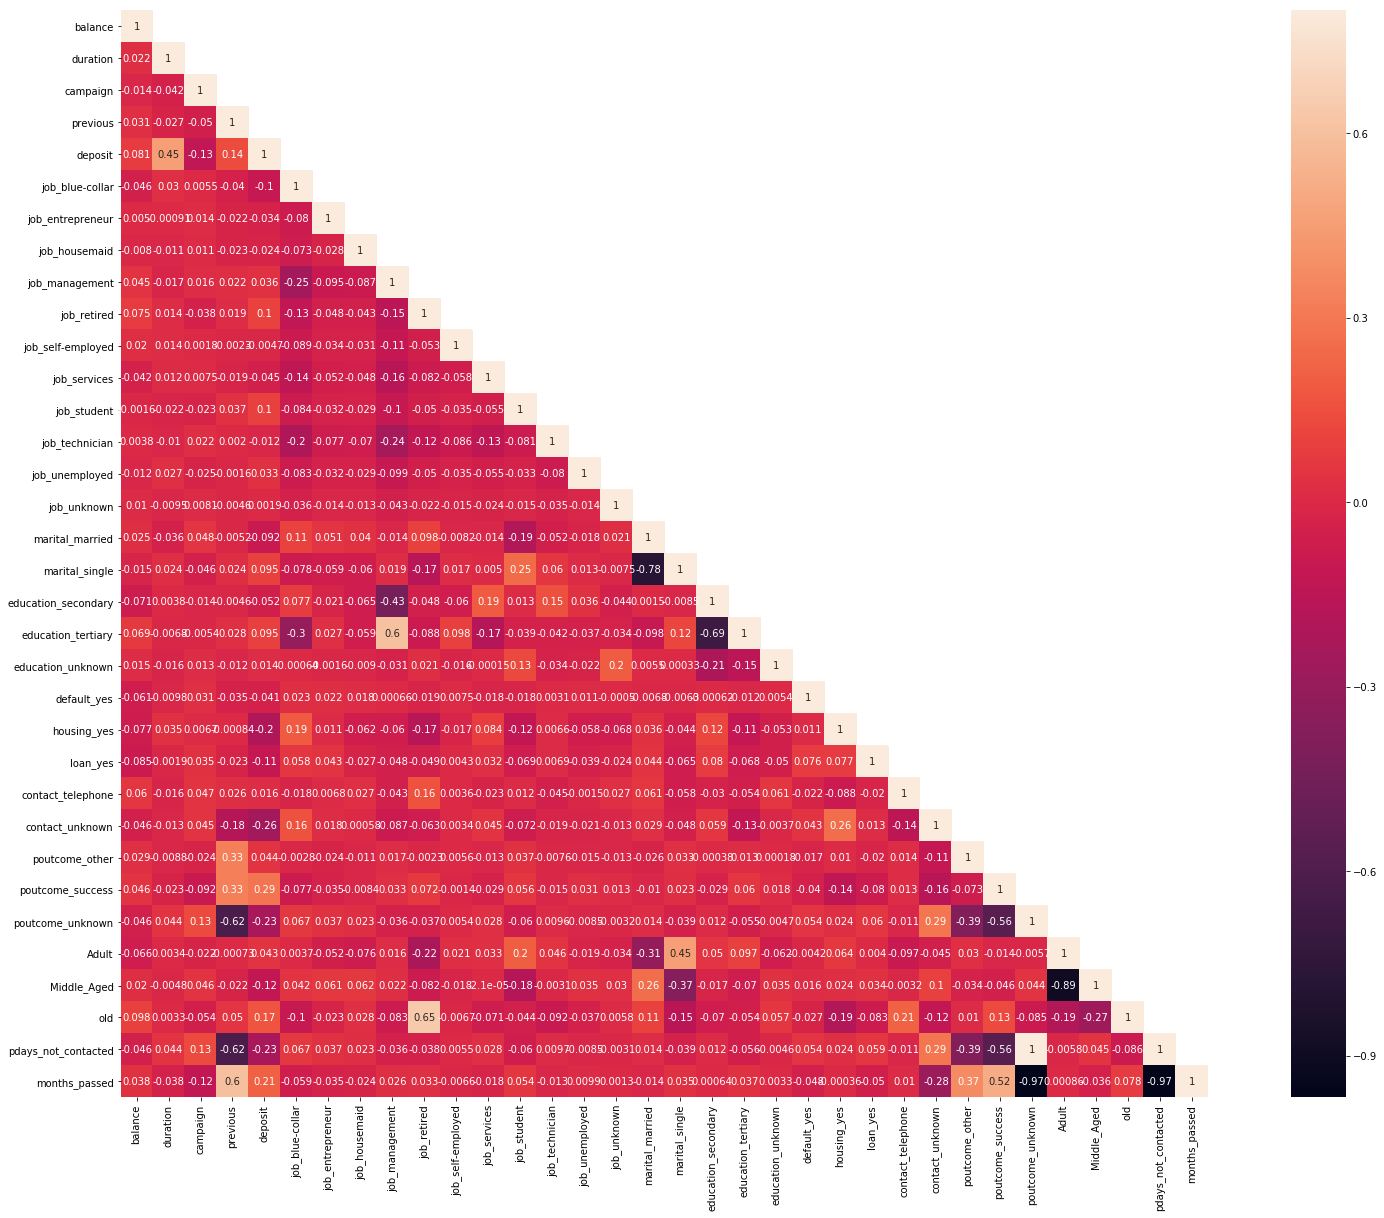

In [32]:
corrMatt = data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(30,20)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [33]:
#De functie hier detecteerd en geeft de locatie aan van outliers binnen een kolom.
def outDetection(df, column_name):
    elements = np.array(df[column_name])
    mean = np.mean(elements, axis=0)  #mean of data
    sd = np.std(elements, axis=0)     #standard deviation of data
    list_l = [i for i, y in enumerate(elements) if (y < mean - 2*sd)]
    list_m = [i for i, x in enumerate(elements) if (x > mean + 2*sd)]
    total_n = list_l + list_m
    return total_n

In [34]:
out_cols = ['age', 'balance', 'duration']

In [36]:
for i in out_cols:
    print('Percentage of outliers in ' + i + ' is: ' + str(round(len(outDetection(df, i))/len(df)*100, 2)) + ' %')

Percentage of outliers in age is: 3.57 %
Percentage of outliers in balance is: 3.08 %
Percentage of outliers in duration is: 5.17 %


<h1> Feature Selectie met Decision Tree </h1>

Bekijken welke features de meest belangrijke zijn.

Feature ranking:
1. Feature 1 (0.619341)
2. Feature 26 (0.162634)
3. Feature 24 (0.143677)
4. Feature 21 (0.068396)
5. Feature 3 (0.002923)
6. Feature 22 (0.000741)
7. Feature 0 (0.000732)
8. Feature 15 (0.000703)
9. Feature 5 (0.000668)
10. Feature 18 (0.000186)
11. Feature 8 (0.000000)
12. Feature 10 (0.000000)
13. Feature 9 (0.000000)
14. Feature 6 (0.000000)
15. Feature 7 (0.000000)
16. Feature 12 (0.000000)
17. Feature 4 (0.000000)
18. Feature 2 (0.000000)
19. Feature 11 (0.000000)
20. Feature 32 (0.000000)
21. Feature 13 (0.000000)
22. Feature 14 (0.000000)
23. Feature 31 (0.000000)
24. Feature 17 (0.000000)
25. Feature 19 (0.000000)
26. Feature 20 (0.000000)
27. Feature 23 (0.000000)
28. Feature 25 (0.000000)
29. Feature 27 (0.000000)
30. Feature 28 (0.000000)
31. Feature 29 (0.000000)
32. Feature 30 (0.000000)
33. Feature 16 (0.000000)


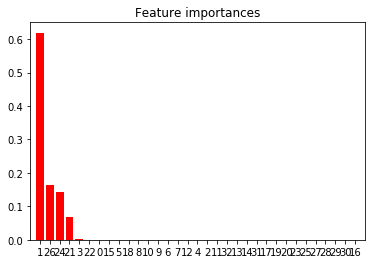

In [38]:
#Feature Belangrijkheid
from sklearn import tree

y = data.deposit.values
X = data.drop(['deposit'],axis=1)
#het bouwen van een "forest" en het berekenen van de feature belangrijkheden.
clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X,y)
importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

#printen van de feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

#plotten van de feature belangrijkheid van de gemaakte forest.
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [38]:
imp_ind = pd.Series(importances).sort_values()[pd.Series(importances).sort_values() != 0].index.tolist()

In [40]:
imp_cols = data.columns[[imp_ind]]

<h1> Feature Selectie met Lasso Regressie </h1>

[ 0.  0. -0.  0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0.  0.]


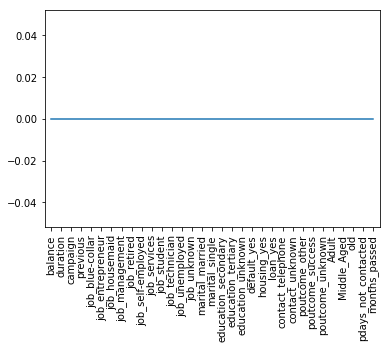

In [41]:
#importeren van een lasso
from sklearn.linear_model import Lasso

#initialiseren van een lasso regressor: lasso 
lasso = Lasso(alpha=0.4, normalize=True)

#fitten van de lasso op de data 
lasso.fit(X, y)

#berekenen en printen van de coeefficent
lasso_coef = lasso.coef_
print(lasso_coef)

df_columns = X.columns

# Plot van de coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
locs, labels = plt.xticks()
_ = plt.setp(labels, rotation=90)
plt.show()

[ 0.  0. -0.  0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0.  0. -0.
  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0.  0.]


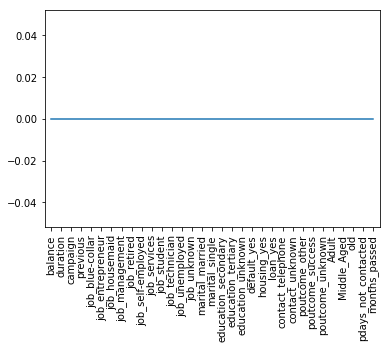

In [41]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

df_columns = X.columns

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
locs, labels = plt.xticks()
_ = plt.setp(labels, rotation=90)
plt.show()

Zo te zien is lasso regressie dus niet ideaal voor de data. Te zien is dat de lasso alle data als hetzelfde laat zien (waarde)

<h1> Predictive Modeling met meest belangrijke features </h1>

In [42]:
X = data[imp_cols]
y = data.deposit

<h2> Scalen van data en het toepassen van Principle Component Analyse </h2>

In [44]:
# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Applying PCA
pca = PCA(n_components=None)
pca.fit_transform(X_train)
pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.19341882 0.12532032 0.10477701 0.10188248 0.09864031 0.09442829
 0.08634397 0.08465204 0.07172759 0.03880916]


In [48]:
for i in range(1, 10):
    print("No. of Components", i)
    # Applying PCA
    pca = PCA(n_components=i)
    x_train = pca.fit_transform(X_train)
    x_test = pca.transform(X_test)
    explained_variance = pca.explained_variance_ratio_
    print("CoVariance:", sum(explained_variance)*100)

    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    print("Logistic Regression Accuracy Score:", lr.score(x_test, y_test)*100)

    rf = ensemble.RandomForestClassifier()
    rf.fit(x_train, y_train)
    print("Random Forest Accuracy Score:", rf.score(x_test, y_test)*100)

    svm = SVC(kernel='linear',random_state=0)
    rf.fit(x_train, y_train)
    print("SVC Accuracy Score:", rf.score(x_test, y_test)*100)
    
    dt = clf = tree.DecisionTreeClassifier(max_depth=5)
    dt.fit(x_train, y_train)
    print("DecisionTreeClassifier Accuracy Score:", dt.score(x_test, y_test)*100)

No. of Components 1
CoVariance: 19.341881703692625
Logistic Regression Accuracy Score: 61.35244066278549
Random Forest Accuracy Score: 55.575459023734886


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


SVC Accuracy Score: 56.51589789520825
DecisionTreeClassifier Accuracy Score: 67.39811912225704
No. of Components 2
CoVariance: 31.873914194406204
Logistic Regression Accuracy Score: 61.53157187639946
Random Forest Accuracy Score: 71.92118226600985
SVC Accuracy Score: 72.05553067622034


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


DecisionTreeClassifier Accuracy Score: 70.26421854008062
No. of Components 3
CoVariance: 42.35161502751084
Logistic Regression Accuracy Score: 63.994626063591575
Random Forest Accuracy Score: 72.9064039408867
SVC Accuracy Score: 74.56336766681594
DecisionTreeClassifier Accuracy Score: 72.50335871025526
No. of Components 4


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CoVariance: 52.53986266181593
Logistic Regression Accuracy Score: 68.92073443797582
Random Forest Accuracy Score: 73.75727720555307
SVC Accuracy Score: 74.33945364979849
DecisionTreeClassifier Accuracy Score: 72.54814151365876
No. of Components 5
CoVariance: 62.40389395951822
Logistic Regression Accuracy Score: 72.81683833407972
Random Forest Accuracy Score: 74.42901925660547


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


SVC Accuracy Score: 74.1603224361845
DecisionTreeClassifier Accuracy Score: 74.2498880429915
No. of Components 6
CoVariance: 71.84672312324017
Logistic Regression Accuracy Score: 73.26466636811463
Random Forest Accuracy Score: 74.07075682937752


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


SVC Accuracy Score: 74.07075682937752
DecisionTreeClassifier Accuracy Score: 74.205105239588
No. of Components 7
CoVariance: 80.48112048604416
Logistic Regression Accuracy Score: 73.66771159874608
Random Forest Accuracy Score: 73.5333631885356


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


SVC Accuracy Score: 73.89162561576354
DecisionTreeClassifier Accuracy Score: 74.33945364979849
No. of Components 8
CoVariance: 88.94632478039838
Logistic Regression Accuracy Score: 77.11598746081505
Random Forest Accuracy Score: 74.02597402597402


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


SVC Accuracy Score: 74.11553963278101
DecisionTreeClassifier Accuracy Score: 75.59337214509628
No. of Components 9
CoVariance: 96.11908365681846
Logistic Regression Accuracy Score: 77.25033587102553


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Accuracy Score: 73.48858038513211
SVC Accuracy Score: 74.33945364979849
DecisionTreeClassifier Accuracy Score: 75.54858934169279


Hierin zie ik dat de Logistische Regressie classifier de beste resultaat geeft op de data.
Verder heb ik de PCA toegepast om het model complexiteit aan te passen van mijn predictie algoritme. 

<h1> De score is ook beter zo te zien wanneer ik alle features gebruik. Wellicht omdat sommige features een grote rol hebben in modeling

* Logistic Regressor Accuracy Score: 81.415
* Random Forest Accuracy Score: 77.071
* SVC Accuracy Score: 76.041
* DecisionTreeClassifier Accuracy Score: 72.324

<h1> Checken van de Mean Squared Error en Variance </h1>

In [49]:
pred = lr.predict(x_test)

In [50]:
# MSE
print("Mean squared error: %.2f"
      % mean_squared_error(pred, y_test))
# Variance Score: Waarbij 1 de perfecte predictie is
print('Variance score: %.2f' % r2_score(pred, y_test))

Mean squared error: 0.23
Variance score: 0.07


In [51]:
print('Accuracy in Percentage: ', metrics.accuracy_score(y_test.values, pred)*100, 'Procent')

Accuracy in Percentage:  77.25033587102553 Procent


In [52]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1205
           1       0.77      0.72      0.75      1028

   micro avg       0.77      0.77      0.77      2233
   macro avg       0.77      0.77      0.77      2233
weighted avg       0.77      0.77      0.77      2233



In [53]:
auc = roc_auc_score(y_test, pred)
print('AUC: %.3f' % auc)

AUC: 0.769


In [54]:
x_roc, y_roc, thresholds = roc_curve(y_test, pred)

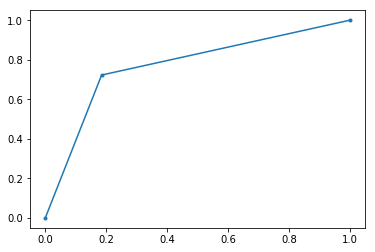

In [55]:
_ = plt.plot(x_roc, y_roc, marker='.')
plt.show()

In [56]:
precision, recall, thresholds = precision_recall_curve(y_test, pred)

In [57]:
f1 = f1_score(y_test, pred)

In [58]:
ap = average_precision_score(y_test, pred)

In [59]:
print('f1 score = %.3f auc = %.3f ap = %.3f' % (f1, auc, ap))

f1 score = 0.745 auc = 0.769 ap = 0.684


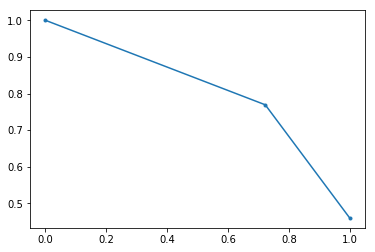

In [60]:
_ = plt.plot(recall, precision, marker='.')
plt.show()